## FIRST APPROACH FOR THE TWO FIRST NAICS DIGITS


# # DATA UNDERSTANDING

In [5]:
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

route1 = '../data/SBS_Certified_Business_List.csv'  
route2 = '../data/bussinesses_licences.csv'  
route3 = '../data/Listing_of_Active_Businesses.csv'
route4 = '../data/sba_dataset.csv'
route5 = '../data/subsectors_description_Kodiak.csv'


try:  #LUIS1
    df4 = pd.read_csv(route4)
    first_row = df4.iloc[0].to_dict()
    logging.info("First row df4:")
    for columna, valor in first_row.items():
        logging.info(f"{columna}: {valor}")
except Exception as e:
    logging.error("Error loading csv: %s", e)
    
print(df4.shape)
'''
try:  #LUIS2(descriptions)
    df5 = pd.read_csv(route5)
    first_row = df5.iloc[0].to_dict()
    logging.info("First row df5:")
    for columna, valor in first_row.items():
        logging.info(f"{columna}: {valor}")
except Exception as e:
    logging.error("Error loading csv: %s", e)
    
print(df5.shape)

'''

try:  #LUIS3
    df1 = pd.read_csv(route1)
    first_row = df1.iloc[0].to_dict()
    logging.info("First row df1:")
    for columna, valor in first_row.items():
        logging.info(f"{columna}: {valor}")
except Exception as e:
    logging.error("Error loading csv: %s", e)
    
print(df1.shape)
'''
try: # 2012
    df2 = pd.read_csv(route2)
    first_row = df2.iloc[0].to_dict()
    logging.info("First row df2:")
    for columna, valor in first_row.items():
        logging.info(f"{columna}: {valor}")
except Exception as e:
    logging.error("Error loading csv: %s", e)
    
print(df2.shape)

try: #very unbalanced, a lot of nans in naics
    df3 = pd.read_csv(route3)
    first_row = df3.iloc[0].to_dict()
    logging.info("First row df3:")
    for columna, valor in first_row.items():
        logging.info(f"{columna}: {valor}")
except Exception as e:
    logging.error("Error loading csv: %s", e)
    
print(df3.shape)


naics_nan_count = df3['NAICS'].isna().sum()
print(f"Número de filas con NAICS = NaN: {naics_nan_count}")
'''

df1_filtered = df1.dropna(subset=['Business_Description'])[['Business_Description', 'ID6_digit_NAICS_code']]


df4_filtered = df4[df4['NAICS'].apply(lambda x: ',' not in str(x) and ' ' not in str(x))]
df4_filtered = df4_filtered[['NAICS', 'DESCRIPTION_OF_OPERATIONS']]


df1_filtered['ID6_digit_NAICS_code'] = df1_filtered['ID6_digit_NAICS_code'].astype(str)
df4_filtered['NAICS'] = df4_filtered['NAICS'].astype(str)


merged_df = pd.merge(df1_filtered, df4_filtered, how='outer',
                     left_on='ID6_digit_NAICS_code', right_on='NAICS',
                     suffixes=('_Business_Description', '_DESCRIPTION_OF_OPERATIONS'))

print(merged_df.shape)



2024-04-03 23:06:35,659 - INFO - First row df4:
2024-04-03 23:06:35,661 - INFO - BUSINESS_NAME: TALTON COMMUNICATIONS INC
2024-04-03 23:06:35,662 - INFO - BUSINESS_OPT_TYPE: nan
2024-04-03 23:06:35,664 - INFO - CONTACT: JULIUS TALTON
2024-04-03 23:06:35,665 - INFO - DESCRIPTION_KEYWORDS: Inmate Payphones, Coined Payphones, VOIP Phones Services, Managed Services, Telecommunications
2024-04-03 23:06:35,666 - INFO - DESCRIPTION_OF_OPERATIONS: nan
2024-04-03 23:06:35,667 - INFO - EMAIL_ADDRESS: julius@talton.com
2024-04-03 23:06:35,668 - INFO - EMALL_PAGE_URL: nan
2024-04-03 23:06:35,670 - INFO - EXPORT_BUSINESS_ACTIVITIES: nan
2024-04-03 23:06:35,671 - INFO - EXPORT_BUSINESS_RELATIONSHIPS: nan
2024-04-03 23:06:35,672 - INFO - EXPORT_COUNTRIES: nan
2024-04-03 23:06:35,673 - INFO - EXPORT_OBJECTIVE: nan
2024-04-03 23:06:35,675 - INFO - FULL_ADDRESS: 910 RAVENWOOD DR SELMA, AL 36701-6723
2024-04-03 23:06:35,677 - INFO - IS_EXPORTER: No
2024-04-03 23:06:35,678 - INFO - LEGAL_STRUCTURE: SC
202

(65286, 22)


2024-04-03 23:06:35,923 - INFO - First row df1:
2024-04-03 23:06:35,925 - INFO - Account_Number: 311147
2024-04-03 23:06:35,926 - INFO - Vendor_Formal_Name: #1Pho Inc
2024-04-03 23:06:35,927 - INFO - Vendor_DBA: Zenyai
2024-04-03 23:06:35,928 - INFO - First_Name: Albert
2024-04-03 23:06:35,929 - INFO - Last_Name: Jethanamest
2024-04-03 23:06:35,930 - INFO - telephone: 6463879761
2024-04-03 23:06:35,931 - INFO - Business_Description: Zenyai Viet Cajun & Pho Restaurant is dedicated to offering real Vietnamese flavor through distinct seafood boils and pho noodle dishes.
2024-04-03 23:06:35,932 - INFO - Certification: MBE
2024-04-03 23:06:35,933 - INFO - Certification_Renewal_Date: 10/31/2025
2024-04-03 23:06:35,935 - INFO - Ethnicity: ASIAN
2024-04-03 23:06:35,936 - INFO - Address_Line_1: 208 Grand Street
2024-04-03 23:06:35,937 - INFO - Address_Line_2: nan
2024-04-03 23:06:35,938 - INFO - City: Brooklyn
2024-04-03 23:06:35,939 - INFO - State: NY
2024-04-03 23:06:35,940 - INFO - Postcode:

(11430, 56)
(1412766, 4)


In [11]:

# Ajustar df1
df1_filtered = df1.dropna(subset=['Business_Description'])[['ID6_digit_NAICS_code', 'Business_Description']]
df1_filtered.columns = ['NAICS', 'BUSINESS_DESCRIPTION']
df1_filtered['NAICS'] = df1_filtered['NAICS'].astype(str)

# Ajustar df4
df4_filtered = df4[df4['NAICS'].apply(lambda x: ',' not in str(x) and ' ' not in str(x))][['NAICS', 'DESCRIPTION_OF_OPERATIONS']]
df4_filtered.columns = ['NAICS', 'BUSINESS_DESCRIPTION']
df4_filtered['NAICS'] = df4_filtered['NAICS'].astype(str)

# Concatenar df1_filtered y df4_filtered
df_concatenated = pd.concat([df1_filtered, df4_filtered], ignore_index=True)

# Filtrar filas donde NAICS o BUSINESS_DESCRIPTION sean NaN
final_df = df_concatenated.dropna(subset=['NAICS', 'BUSINESS_DESCRIPTION'])

# Asegurar que el DataFrame final solo contenga las columnas deseadas: 'NAICS' y 'BUSINESS_DESCRIPTION'
final_df = final_df[['NAICS', 'BUSINESS_DESCRIPTION']]

# Mostrar las primeras filas para confirmar la estructura
print(final_df.head())

nan_count = final_df.isna().sum()
logging.info("missing values per feature:\n%s", nan_count)
print(final_df.shape)


2024-04-03 23:16:03,822 - INFO - missing values per feature:
NAICS                   0
BUSINESS_DESCRIPTION    0
dtype: int64


    NAICS                               BUSINESS_DESCRIPTION
0  722511  Zenyai Viet Cajun & Pho Restaurant is dedicate...
1  541330  Kilduff Underground Engineering, Inc. (KUE) is...
2  453998  024™ is a premium home fragrance brand that de...
3  561720  Our Services include Office Cleaning Carpet cl...
4  621610                    NYS Licensed Home Health Agency
(14182, 2)


LET'S MAKE SOME ANALYSIS OF THE DATASET TO UNDERSTAND IT BETTER:

Firstly, let's clarify that we are carrying this project as a classification problem; where we are going to procced classifying each digit of the NAICS code.

First digit of the NAICS code: Represents the general economic sector.
Second digit: Provides subsector information within the economic sector.
Third digit: Gives more details on the subsector's subdivision.
Fourth digit: Indicates the group industry.
Fifth digit: Offers even more specific information, often related to the national industry.
Sixth digit: Used for more detailed and specific classifications within a national industry, although not all countries use the sixth digit.


This approach results in a separate classification problem, where the first step will be classifying the two first digits

Before starting to solve any datset trade-offs, let's see  the bussinesses stored in df1:

In [83]:

try:
    unique_naics_count = df1['ID6_digit_NAICS_code'].nunique()
    logging.info(f"Number of unique NAICS codes: {unique_naics_count}")

    top_repeated_naics = df1['ID6_digit_NAICS_code'].value_counts().head(1)
    logging.info(" most repeated NAICS codes and their counts:")
    for code, count in top_repeated_naics.items():
        logging.info(f"NAICS code {code} is repeated {count} times.")
    naics_counts = df1['ID6_digit_NAICS_code'].value_counts()
    ranges = [(1,20),(20, 50), (50, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 600)]
    for r in ranges:
        count = naics_counts[(naics_counts >= r[0]) & (naics_counts <= r[1])].count()
        logging.info(f"Number of NAICS codes with occurrences between {r[0]} and {r[1]}: {count}")
except KeyError as e:
    logging.error(f"Column not found in DataFrame: {e}")
except Exception as e:
    logging.error(f"An unexpected error occurred during the analysis: {e}")
'''
try:
    unique_naics_count = df3['NAICS'].nunique()
    logging.info(f"Number of unique NAICS codes: {unique_naics_count}")

    top_repeated_naics = df3['NAICS'].value_counts().head(1)
    logging.info("Top 5 most repeated NAICS codes and their counts:")
    for code, count in top_repeated_naics.items():
        logging.info(f"NAICS code {code} is repeated {count} times.")
    naics_counts = df3['NAICS'].value_counts()
    ranges = [(1,20),(20, 50), (50, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 600)]
    for r in ranges:
        count = naics_counts[(naics_counts >= r[0]) & (naics_counts <= r[1])].count()
        logging.info(f"Number of NAICS codes with occurrences between {r[0]} and {r[1]}: {count}")
except KeyError as e:
    logging.error(f"Column not found in DataFrame: {e}")
except Exception as e:
    logging.error(f"An unexpected error occurred during the analysis: {e}")
'''

2024-04-03 18:37:33,517 - INFO - Number of unique NAICS codes: 588
2024-04-03 18:37:33,521 - INFO -  most repeated NAICS codes and their counts:
2024-04-03 18:37:33,522 - INFO - NAICS code 541990 is repeated 534 times.
2024-04-03 18:37:33,524 - INFO - Number of NAICS codes with occurrences between 1 and 20: 480
2024-04-03 18:37:33,526 - INFO - Number of NAICS codes with occurrences between 20 and 50: 57
2024-04-03 18:37:33,528 - INFO - Number of NAICS codes with occurrences between 50 and 100: 29
2024-04-03 18:37:33,530 - INFO - Number of NAICS codes with occurrences between 100 and 200: 16
2024-04-03 18:37:33,533 - INFO - Number of NAICS codes with occurrences between 200 and 300: 3
2024-04-03 18:37:33,535 - INFO - Number of NAICS codes with occurrences between 300 and 400: 6
2024-04-03 18:37:33,537 - INFO - Number of NAICS codes with occurrences between 400 and 500: 0
2024-04-03 18:37:33,539 - INFO - Number of NAICS codes with occurrences between 500 and 600: 1


'\ntry:\n    unique_naics_count = df3[\'NAICS\'].nunique()\n    logging.info(f"Number of unique NAICS codes: {unique_naics_count}")\n\n    top_repeated_naics = df3[\'NAICS\'].value_counts().head(1)\n    logging.info("Top 5 most repeated NAICS codes and their counts:")\n    for code, count in top_repeated_naics.items():\n        logging.info(f"NAICS code {code} is repeated {count} times.")\n    naics_counts = df3[\'NAICS\'].value_counts()\n    ranges = [(1,20),(20, 50), (50, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 600)]\n    for r in ranges:\n        count = naics_counts[(naics_counts >= r[0]) & (naics_counts <= r[1])].count()\n        logging.info(f"Number of NAICS codes with occurrences between {r[0]} and {r[1]}: {count}")\nexcept KeyError as e:\n    logging.error(f"Column not found in DataFrame: {e}")\nexcept Exception as e:\n    logging.error(f"An unexpected error occurred during the analysis: {e}")\n'

As of the latest revision, the American NAICS system defines approximately 1,057 distinct 6-digit codes. As we can see, in this dataset we have only defined 588 different NAICS codes. 
The range of NAICS codes in our dataset is influenced by the timing of data collection, reflecting economic conditions and industry relevance at that moment. Specific focus on certain industry subsectors or objectives may limit the diversity of NAICS codes captured. Geographic location could play a crucial role, as regional economic activities dictate the presence of particular industries. 

More precisely, we see that there are some NAICS codes that are repeated a lot of times. This is very important and significant since it probably means that the dataset is skewed towards certain industries or sectors. This skewness could indicate a concentration of economic activity within these sectors or a particular focus of the dataset collection efforts. Understanding this concentration can provide insights into industry dominance, regional economic strengths, or the specific research objectives guiding the data compilation.





Our fist approach will be classifying the two first digits; so let's check how many combinations are there for the two first digits of the naics code, as we know there should be 24:

In [85]:
df1['First_Two_Digits_NAICS'] = df1['ID6_digit_NAICS_code'].astype(str).str[:2]

num_combinations = df1['First_Two_Digits_NAICS'].nunique()
logging.info(f"Total number of combinations of the first two digits of the NAICS code: {num_combinations}")
combinations_count = df1['First_Two_Digits_NAICS'].value_counts()

for combination, count in combinations_count.items():
    logging.info(f"Combination: {combination}, Count: {count}")

2024-04-03 18:38:15,931 - INFO - Total number of combinations of the first two digits of the NAICS code: 24
2024-04-03 18:38:15,936 - INFO - Combination: 54, Count: 3762
2024-04-03 18:38:15,938 - INFO - Combination: 23, Count: 2546
2024-04-03 18:38:15,939 - INFO - Combination: 56, Count: 841
2024-04-03 18:38:15,941 - INFO - Combination: 61, Count: 689
2024-04-03 18:38:15,943 - INFO - Combination: 42, Count: 461
2024-04-03 18:38:15,944 - INFO - Combination: 81, Count: 375
2024-04-03 18:38:15,945 - INFO - Combination: 62, Count: 362
2024-04-03 18:38:15,946 - INFO - Combination: 51, Count: 316
2024-04-03 18:38:15,947 - INFO - Combination: 71, Count: 283
2024-04-03 18:38:15,948 - INFO - Combination: 72, Count: 264
2024-04-03 18:38:15,949 - INFO - Combination: 53, Count: 256
2024-04-03 18:38:15,951 - INFO - Combination: 33, Count: 218
2024-04-03 18:38:15,952 - INFO - Combination: 48, Count: 205
2024-04-03 18:38:15,953 - INFO - Combination: 45, Count: 204
2024-04-03 18:38:15,954 - INFO - Com

With this approach, we know that there is at least three appearences for every possible combination of the first two digits of the naics code, but we expect to have problems due to the umbalanced classes 

2024-04-03 18:39:00,630 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-04-03 18:39:00,633 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


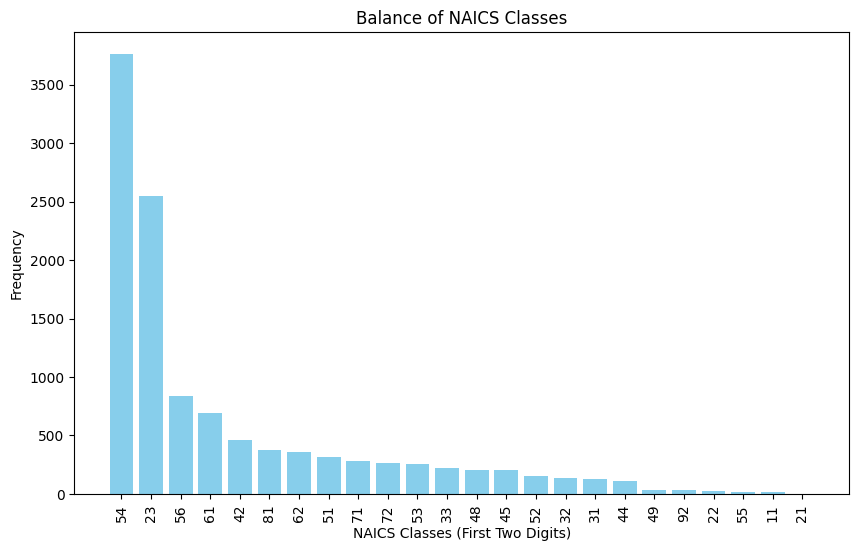

In [86]:
plt.figure(figsize=(10, 6)) 
plt.bar(combinations_count.index, combinations_count.values, color='skyblue')
plt.xlabel('NAICS Classes (First Two Digits)')
plt.ylabel('Frequency')
plt.title('Balance of NAICS Classes')
plt.xticks(rotation=90)  
plt.show()

Class Imbalance: The graph shows a significant class imbalance, with some NAICS classes appearing far more frequently than others. The class '54' is the most frequent, indicating a possible concentration of businesses in professional, scientific, and technical services.

Dominant Classes: A few classes, particularly '54', '23', and '56', dominate the dataset. These classes may represent specific sectors like 'Construction' for '23' and 'Administrative and Support and Waste Management and Remediation Services' for '56'.

Sparse Classes: Many classes have relatively few occurrences, which could present challenges for any classification task due to insufficient data points for those classes.

Data-Driven Decisions: The imbalance suggests that certain sectors are overrepresented in the dataset. When training any classification models, this imbalance would need to be addressed, possibly through techniques like oversampling, undersampling, or applying class weights.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## DATA PREPARATION

In [79]:
nan_count = df1.isna().sum()
logging.info("missing values per feature:\n%s", nan_count)

2024-04-03 18:31:11,493 - INFO - missing values per feature:
Account_Number                                   0
Vendor_Formal_Name                               0
Vendor_DBA                                    9937
First_Name                                      23
Last_Name                                       24
telephone                                       12
Business_Description                             7
Certification                                    0
Certification_Renewal_Date                    3164
Ethnicity                                        3
Address_Line_1                                 116
Address_Line_2                                6984
City                                             0
State                                            0
Postcode                                         1
Mailing_Address_Line_1                           2
Mailing_Address_Line_2                        6888
Mailing_City                                     2
Mailing_State        

We can get a few conclutions from this approach. 

As always, one of the reasons for NaNs can be errors in data collection, so I'm going to ommit this in the following explanations: 

    - vendor_DBA has a lot of Nans. Why? Maybe the formal name is the same as the Vendor_DBA. We can see in the following cell that even from those rows where Vendor_DBA has a value, 51 coincide with the formal name.

    - Certification_Renewal_Date (3,164 NaNs): Not all businesses may require certification, or some may have perpetual certifications not needing renewal.

    - Address_Line_2 (6,984 NaNs), Mailing_Address_Line_2 (6,888 NaNs): These likely represent optional address details (like apartment numbers), which many businesses don't have.

    - Website (3,279 NaNs): Some businesses may not have an online presence, leading to missing website information.

    - Date_Of_Establishment (1,134 NaNs): Record-keeping issues or new businesses might not have established dates yet.

    - Aggregate_Bonding_Limit (10,426 NaNs), Signatory_To_Union_Contracts (10,741 NaNs): Many businesses may not require bonding, and not all are union contractors, explaining the lack of data.

    - Types_of_Construction_Projects_Performed (11,430 NaNs), Capacity_Building_Programs (11,430 NaNs): These could be very specific fields relevant only to certain types of businesses, such as construction, hence not applicable to all.

    - Name_of_Client_Job_Exp_2 (2,525 NaNs), Value_of_Contract_Job_Exp_2 (2,618 NaNs), Percent_Self_Performed_Job_Exp_2 (2,832 NaNs), Date_of_Work_Job_Exp_2 (2,520 NaNs), Description_of_Work_Job_Exp_2 (2,549 NaNs),  Name_of_Client_Job_Exp_3 (3,853 NaNs), Value_of_Contract_Job_Exp_3 (3,956 NaNs), Percent_Self_Performed_Job_Exp_3 (4,245 NaNs), Date_of_Work_Job_Exp_3 (3,852 NaNs), Description_of_Work_Job_Exp_3 (3,871 NaNs): This pattern suggests that not all businesses have multiple client jobs or projects to report, leading to progressively more missing data for subsequent job experiences.
    
    - Geographical details such as Borough (4,324 NaNs), Latitude (4,326 NaNs), Longitude (4,326 NaNs), Community Board (4,326 NaNs), Council District (4,326 NaNs), BIN (4,360 NaNs), BBL (4,360 NaNs), Census Tract (2020) (4,326 NaNs), Neighborhood Tabulation Area (NTA) (2020) (4,326 NaNs): Missing geographical details could be due to incomplete records, businesses not tied to a specific location, or privacy concerns.

Let's firstly get rid of those features which are all NANs:

In [99]:
df1= df1.dropna(axis=1, how='all')

matching_rows = df1[df1['Vendor_DBA'].notna() & (df1['Vendor_DBA'] == df1['Vendor_Formal_Name'])].shape[0]
logging.info(f"Number of rows where 'Vendor_DBA' is not NaN and matches 'Vendor_Formal_Name': {matching_rows}")

#for vendor_DBA, if Nan, place the formal name
df1['Vendor_DBA'] = df1['Vendor_DBA'].fillna(df1['Vendor_Formal_Name'])
###



df1['ID6_digit_NAICS_code'] = df1['ID6_digit_NAICS_code'].astype(str)  # Asegurarse de que el código NAICS sea una cadena
df1 = df1.sort_values(by=['ID6_digit_NAICS_code', 'City'])

def find_name_with_fallback(naics_code, city, state):
    filtered_df = pd.DataFrame()
    for digits in range(len(naics_code), 1, -1):
        naics_start = naics_code[:digits]
        filtered_df = df1[(df1['ID6_digit_NAICS_code'].str.startswith(naics_start)) & (df1['City'] == city)]
        
        if not filtered_df.empty:
            break  # Salir del bucle si encontramos coincidencias
        
        if digits == 2:  # Si llegamos al caso de solo 2 dígitos y aún no hay coincidencias
            logging.info(f"No city match for NAICS starting with {naics_start}. Looking in the same state.")
            filtered_df = df1[(df1['ID6_digit_NAICS_code'].str.startswith(naics_start)) & (df1['State'] == state)]
            if not filtered_df.empty:
                break
        
    if not filtered_df.empty:
        first_name, last_name = filtered_df.iloc[0]['First_Name'], filtered_df.iloc[0]['Last_Name']
        return first_name, last_name
    else:
        logging.warning(f"No match found for any NAICS code prefix in state {state}.")
        return '', ''

for index, row in df1[df1['First_Name'].isnull() | df1['Last_Name'].isnull()].iterrows():
    if pd.notnull(row['City']) and pd.notnull(row['ID6_digit_NAICS_code']) and pd.notnull(row['State']):
        first_name, last_name = find_name_with_fallback(row['ID6_digit_NAICS_code'], row['City'], row['State'])
        df1.at[index, 'First_Name'] = first_name if first_name else df1.at[index, 'First_Name']
        df1.at[index, 'Last_Name'] = last_name if last_name else df1.at[index, 'Last_Name']
        if first_name and last_name:
            logging.info(f"Filled missing name for index {index} with name from a similar business.")
    else:
        logging.warning(f"Insufficient data to find a match for row at index {index}.")
        
        
# Función para calcular la distancia usando la fórmula de Haversine
def haversine(lat1, lon1, lat2, lon2):
    # Radio de la Tierra en kilómetros
    R = 6371.0
    # Convertir coordenadas de grados a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Diferencia de coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Fórmula de Haversine
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Distancia en kilómetros
    distance = R * c
    return distance

# Asegurarse de que el código NAICS sea una cadena y las coordenadas sean numéricas
df1['ID6_digit_NAICS_code'] = df1['ID6_digit_NAICS_code'].astype(str)
df1['Latitude'] = pd.to_numeric(df1['Latitude'], errors='coerce')
df1['Longitude'] = pd.to_numeric(df1['Longitude'], errors='coerce')
df1 = df1.sort_values(by=['ID6_digit_NAICS_code', 'City'])

def find_closest_business(row):
    if pd.isnull(row['Latitude']) or pd.isnull(row['Longitude']):
        return 'unknown_name', 'unknown_name'
    # Calcular distancias a todos los demás negocios
    df1['Distance'] = df1.apply(lambda x: haversine(row['Latitude'], row['Longitude'], x['Latitude'], x['Longitude']), axis=1)
    # Excluir el negocio actual de la comparación
    df_closest = df1.loc[(df1.index != row.name) & (~df1['Distance'].isnull())]
    if df_closest.empty:
        return 'unknown_name', 'unknown_name'
    # Encontrar el negocio más cercano
    closest_row = df_closest.loc[df_closest['Distance'].idxmin()]
    return closest_row['First_Name'], closest_row['Last_Name']

# Aplicar la lógica para cada fila con nombres faltantes
for index, row in df1.loc[df1['First_Name'].isnull() | df1['Last_Name'].isnull()].iterrows():
    first_name, last_name = find_closest_business(row)
    df1.at[index, 'First_Name'] = first_name
    df1.at[index, 'Last_Name'] = last_name
    logging.info(f"Filled missing name for index {index} with name from the closest business based on geographical proximity.")

# Limpieza: Eliminar la columna 'Distance' si ya no se necesita
df1.drop(columns=['Distance'], inplace=True)

remaining_nans = df1[['First_Name', 'Last_Name']].isnull().sum()
logging.info(f"Remaining missing values for 'First_Name': {remaining_nans['First_Name']}")
logging.info(f"Remaining missing values for 'Last_Name': {remaining_nans['Last_Name']}")

logging.info("The first few entries after attempting to fill missing names are:")
logging.info(df1[['First_Name', 'Last_Name']].head())
missing_names_df = df1[df1['First_Name'].isnull() | df1['Last_Name'].isnull()]
print("Filas con valores faltantes en 'First_Name' o 'Last_Name':")
print(missing_names_df)




nan_count = df1.isna().sum()
logging.info("missing values per feature:\n%s", nan_count)




2024-04-03 20:14:30,548 - INFO - Number of rows where 'Vendor_DBA' is not NaN and matches 'Vendor_Formal_Name': 9988
2024-04-03 20:14:30,584 - INFO - Filled missing name for index 7233 with name from a similar business.


2024-04-03 20:14:30,592 - INFO - Filled missing name for index 3972 with name from a similar business.
2024-04-03 20:14:30,600 - INFO - Filled missing name for index 3051 with name from a similar business.
2024-04-03 20:14:30,606 - INFO - Filled missing name for index 9395 with name from a similar business.
2024-04-03 20:14:30,613 - INFO - Filled missing name for index 9345 with name from a similar business.
2024-04-03 20:14:30,619 - INFO - Filled missing name for index 4825 with name from a similar business.
2024-04-03 20:14:30,626 - INFO - Filled missing name for index 4327 with name from a similar business.
2024-04-03 20:14:30,631 - INFO - Filled missing name for index 3436 with name from a similar business.
2024-04-03 20:14:30,640 - INFO - Filled missing name for index 261 with name from a similar business.
2024-04-03 20:14:30,647 - INFO - Filled missing name for index 8130 with name from a similar business.
2024-04-03 20:14:30,656 - INFO - Filled missing name for index 1900 with n

Filas con valores faltantes en 'First_Name' o 'Last_Name':
Empty DataFrame
Columns: [Account_Number, Vendor_Formal_Name, Vendor_DBA, First_Name, Last_Name, telephone, Business_Description, Certification, Certification_Renewal_Date, Ethnicity, Address_Line_1, Address_Line_2, City, State, Postcode, Mailing_Address_Line_1, Mailing_Address_Line_2, Mailing_City, Mailing_State, Mailing_Zip, Website, Date_Of_Establishment, Aggregate_Bonding_Limit, Signatory_To_Union_Contracts, ID6_digit_NAICS_code, NAICS_Sector, NAICS_Subsector, NAICS_Title, NIGP_codes, Name_of_Client_Job_Exp_1, Largest_Value_of_Contract, Percent_Self_Performed_Job_Exp_1, Date_of_Work_Job_Exp_1, Description_of_Work_Job_Exp_1, Name_of_Client_Job_Exp_2, Value_of_Contract_Job_Exp_2, Percent_Self_Performed_Job_Exp_2, Date_of_Work_Job_Exp_2, Description_of_Work_Job_Exp_2, Name_of_Client_Job_Exp_3, Value_of_Contract_Job_Exp_3, Percent_Self_Performed_Job_Exp_3, Date_of_Work_Job_Exp_3, Description_of_Work_Job_Exp_3, Enrolled_in_PASSP

## - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - - - - 

## BASELINE

first option --> identify and count the frequency of specific keywords for each NAICS category within business descriptions, classifying each business into the category with the highest keyword match. 

second option --> use the Jaccard Index for text similarity by comparing word sets from each description against model word sets for each NAICS category, assigning businesses to the category with the highest index. 

third option --> analyze the frequency of bigrams or trigrams, which might be more descriptive of certain NAICS categories, classifying businesses based on the presence of these characteristic combinations